In [53]:
from cartopy.feature import ShapelyFeature,NaturalEarthFeature


In [15]:
from awips.dataaccess import DataAccessLayer
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")


In [16]:
dataTypes = DataAccessLayer.getSupportedDatatypes()
list(dataTypes)

['acars',
 'airep',
 'binlightning',
 'bufrmosAVN',
 'bufrmosETA',
 'bufrmosGFS',
 'bufrmosHPC',
 'bufrmosLAMP',
 'bufrmosMRF',
 'bufrua',
 'climate',
 'common_obs_spatial',
 'gfe',
 'gfeEditArea',
 'grid',
 'maps',
 'modelsounding',
 'obs',
 'practicewarning',
 'profiler',
 'radar',
 'radar_spatial',
 'satellite',
 'sfcobs',
 'streamflow',
 'topo',
 'warning']

In [17]:
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")

In [65]:
DataAccessLayer.getAvailableLocationNames?

In [18]:
available_grids = DataAccessLayer.getAvailableLocationNames(request)
available_grids.sort()
list(available_grids)

['AUTOSPE',
 'CMC',
 'ESTOFS',
 'ETSS',
 'FFG-ALR',
 'FFG-FWR',
 'FFG-KRF',
 'FFG-MSR',
 'FFG-ORN',
 'FFG-PTR',
 'FFG-RHA',
 'FFG-RSA',
 'FFG-STR',
 'FFG-TAR',
 'FFG-TIR',
 'FFG-TUA',
 'GEFS',
 'GFS',
 'GFS20',
 'HFR-EAST_6KM',
 'HFR-EAST_PR_6KM',
 'HFR-US_EAST_DELAWARE_1KM',
 'HFR-US_EAST_FLORIDA_2KM',
 'HFR-US_EAST_NORTH_2KM',
 'HFR-US_EAST_SOUTH_2KM',
 'HFR-US_EAST_VIRGINIA_1KM',
 'HFR-US_HAWAII_1KM',
 'HFR-US_HAWAII_2KM',
 'HFR-US_HAWAII_6KM',
 'HFR-US_WEST_500M',
 'HFR-US_WEST_CENCAL_2KM',
 'HFR-US_WEST_LOSANGELES_1KM',
 'HFR-US_WEST_LOSOSOS_1KM',
 'HFR-US_WEST_NORTH_2KM',
 'HFR-US_WEST_SANFRAN_1KM',
 'HFR-US_WEST_SOCAL_2KM',
 'HFR-US_WEST_WASHINGTON_1KM',
 'HFR-WEST_6KM',
 'HPCGuide',
 'HPCqpfNDFD',
 'HRRR',
 'LAMP2p5',
 'MOSGuide',
 'NAM12',
 'NAM40',
 'NOHRSC-SNOW',
 'NationalBlend',
 'PROB3HR',
 'RAP13',
 'RTMA',
 'RTOFS-Now-WestAtl',
 'RTOFS-Now-WestConus',
 'RTOFS-WestAtl',
 'RTOFS-WestConus',
 'SPCGuide',
 'SeaIce',
 'TPCWindProb',
 'URMA25',
 'WRF-alt',
 'WRF-primary',
 'W

In [19]:
request.setLocationNames("NAM12")

In [20]:
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
list(availableParms)

['ALBDO',
 'AV',
 'Along',
 'AppT',
 'BGRUN',
 'BGRUN10hr',
 'BGRUN11hr',
 'BGRUN12hr',
 'BGRUN1hr',
 'BGRUN2hr',
 'BGRUN3hr',
 'BGRUN4hr',
 'BGRUN5hr',
 'BGRUN6hr',
 'BGRUN7hr',
 'BGRUN8hr',
 'BGRUN9hr',
 'BLI',
 'BMIXL',
 'BRTMP',
 'CAPE',
 'CCOND',
 'CCP',
 'CDCON',
 'CFRZR',
 'CICEP',
 'CIn',
 'CNVHR',
 'CNVHR1hr',
 'CNVHR2hr',
 'CNVHR3hr',
 'CNVHR4hr',
 'CNVHR5hr',
 'CNVHR6hr',
 'CNWAT',
 'CP',
 'CP10hr',
 'CP11hr',
 'CP12hr',
 'CP1hr',
 'CP2hr',
 'CP3hr',
 'CP4hr',
 'CP5hr',
 'CP6hr',
 'CP7hr',
 'CP8hr',
 'CP9hr',
 'CPOFP',
 'CPRAT',
 'CPr',
 'CPrD',
 'CRAIN',
 'CSNOW',
 'CUEFI',
 'CXR',
 'CritT1',
 'DLWRF',
 'DSWRF',
 'DSWRF1hr',
 'DSWRF2hr',
 'DSWRF3hr',
 'DSWRF4hr',
 'DSWRF5hr',
 'DSWRF6hr',
 'DivF',
 'DivFn',
 'DivFs',
 'DpD',
 'DpT',
 'EHI',
 'EHI01',
 'EHIi',
 'EMSP',
 'EPT',
 'EPTA',
 'EPTC',
 'EPTGrd',
 'EPTGrdM',
 'EPTs',
 'FRICV',
 'FRIME',
 'FVecs',
 'FeatMot',
 'FnVecs',
 'FsVecs',
 'GH',
 'GHxSM',
 'Gust',
 'HCDC',
 'HINDEX',
 'HIdx',
 'HPBL',
 'Heli',
 'ICEC',
 'Int

In [21]:
availableLevels = DataAccessLayer.getAvailableLevels(request)
for level in availableLevels:
    print(level)

0.0SFC
0.0CTL
200.0MB
0.0LCY
0.0EA
273.15TEMP
0.0FHAG
340.0_350.0K
261.149_255.149TEMP
290.0_300.0K
264.15TEMP
400.0_1000.0BL
340.0K
255.0K
255.0_265.0K
320.0_330.0K
150.0_180.0BL
330.0K
0.0CBL
0.0CCTL
300.0_310.0K
320.0K
345.0K
250.0_260.0K
275.0_285.0K
310.0K
0.0_30.0BL
0.0_180.0BL
0.0_255.0BL
0.0_90.0BL
335.0K
325.0_335.0K
300.0K
315.0_325.0K
325.0K
335.0_345.0K
315.0K
303.15TEMP
90.0_120.0BL
305.0K
293.15TEMP
233.149TEMP
120.0_150.0BL
283.15TEMP
265.0_275.0K
243.149TEMP
330.0_340.0K
263.15_243.149TEMP
274.15TEMP
276.15_272.15TEMP
270.15_263.15TEMP
275.15TEMP
298.15TEMP
253.149TEMP
276.15TEMP
310.0_320.0K
277.15TEMP
288.15TEMP
263.15TEMP
278.15TEMP
290.0K
305.0_315.0K
238.149TEMP
285.0_295.0K
262.15TEMP
261.149TEMP
260.0_270.0K
280.0K
260.149TEMP
248.149TEMP
270.0_280.0K
60.0_90.0BL
259.149TEMP
295.0K
295.0_305.0K
270.0K
280.0_290.0K
271.15TEMP
258.149TEMP
260.0K
270.15TEMP
257.149TEMP
285.0K
30.0_60.0BL
263.15_260.149TEMP
253.149_243.149TEMP
269.15TEMP
256.149TEMP
250.0K
250.0_350.

In [49]:
import numpy as np

In [ ]:
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(16, 9),
            subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [115]:
from awips.dataaccess import DataAccessLayer
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")
request.setLocationNames("RAP13")
request.setParameters("GH")
request.setParameters("wSp")
#request.setLevels("10.0FHAG")
request.setLevels("250.0MB")
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)
print(np.unique(times))
fcstRun = DataAccessLayer.getForecastRun(cycles[-1], times)
response = DataAccessLayer.getGridData(request, [fcstRun[0]])
grid = response[0]
data = grid.getRawData()
lons, lats = grid.getLatLonCoords()
bbox = [lons.min(), lons.max(), lats.min(), lats.max()]


[<DataTime instance: 2019-08-05 14:00:00 >
 <DataTime instance: 2019-08-05 14:00:00 >
 <DataTime instance: 2019-08-05 14:00:00 >
 <DataTime instance: 2019-08-05 15:00:00 >
 <DataTime instance: 2019-08-05 15:00:00 >
 <DataTime instance: 2019-08-05 15:00:00 >
 <DataTime instance: 2019-08-05 16:00:00 >
 <DataTime instance: 2019-08-05 16:00:00 >
 <DataTime instance: 2019-08-05 17:00:00 >
 <DataTime instance: 2019-08-05 14:00:00 >
 <DataTime instance: 2019-08-05 14:00:00 >
 <DataTime instance: 2019-08-05 14:00:00 >
 <DataTime instance: 2019-08-05 14:00:00 >
 <DataTime instance: 2019-08-05 15:00:00 >
 <DataTime instance: 2019-08-05 15:00:00 >
 <DataTime instance: 2019-08-05 16:00:00 >
 <DataTime instance: 2019-08-05 16:00:00 >
 <DataTime instance: 2019-08-05 17:00:00 >
 <DataTime instance: 2019-08-05 17:00:00 >
 <DataTime instance: 2019-08-05 14:00:00 >
 <DataTime instance: 2019-08-05 15:00:00 >
 <DataTime instance: 2019-08-05 14:00:00 >
 <DataTime instance: 2019-08-05 15:00:00 >
 <DataTime 

In [116]:
grid.getDataTime().getRefTime()

2019-08-05 17:00:00.000

/Users/chowdahead/miniconda3/envs/py-awips/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


Denver


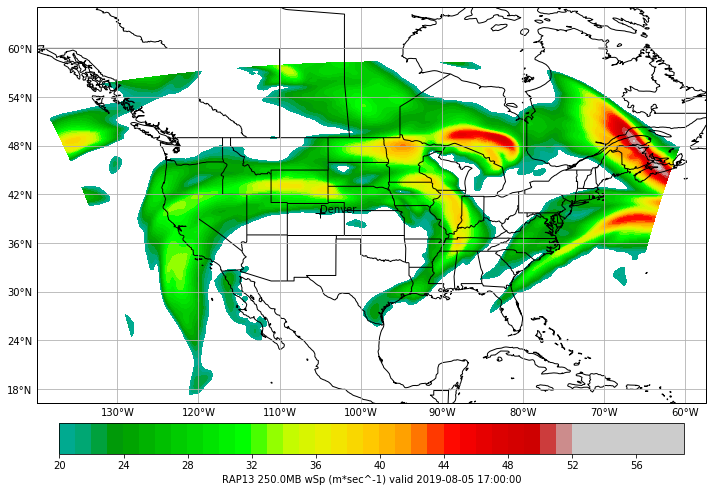

In [122]:
cmap = plt.get_cmap('nipy_spectral')
fig2, ax2 = make_map(bbox=bbox)
levels = np.arange(20,60,1)
cs2 = ax2.contourf(lons, lats, data, levels, cmap=cmap,
                  vmin=data.min(), vmax=data.max())
#plt.title(str(grid.getLocationName()) +" " \
#              + str(grid.getLevel()) + " " \
#               + str(grid.getParameter()) \
#               + " (" + str(grid.getUnit()) + ") " \
#               + "valid " + str(grid.getDataTime().getRefTime()))
cbar2 = fig2.colorbar(cs2, shrink=0.7, orientation='horizontal',pad=0.04)
cbar2.set_label(str(grid.getLocationName()) +" " \
               + str(grid.getLevel()) + " " \
               + str(grid.getParameter()) \
               + " (" + str(grid.getUnit()) + ") " \
               + "valid " + str(grid.getDataTime()))#.getRefTime()))

from geopy.geocoders import Nominatim
import math

#cities = ["Colorado Springs",
#          "Boulder",
#          "Fort Collins",
#         "Denver"] #"Pueblo"

states = NaturalEarthFeature(category='cultural',
                               name='admin_1_states_provinces_lines',
                               scale='50m', facecolor='none')
ax2.add_feature(states, linestyle='-', edgecolor='black',linewidth=1)


political_boundaries = NaturalEarthFeature(category='cultural',
                               name='admin_0_boundary_lines_land',
                               scale='50m', facecolor='none')
#ax2.add_feature(cfeature.LAND)
#ax2.add_feature(cfeature.COASTLINE)

ax2.add_feature(political_boundaries, edgecolor='black')


cities = ["Denver"]

geolocator = Nominatim()
for city in cities:
    print(city)
    loc = geolocator.geocode(city)
    #x, y = plt(loc.longitude, loc.latitude)
    ax2.plot(loc.longitude, loc.latitude,marker='+',color='k',markersize=10)
    ax2.text(loc.longitude-0.05, loc.latitude+0.05,city,color='k')#linewidth=4,


In [14]:
from __future__ import print_function
from awips.dataaccess import DataAccessLayer
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import ShapelyFeature,NaturalEarthFeature
from shapely.geometry import Polygon
from shapely.ops import cascaded_union

# Standard map plot
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
            subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [17]:
# Define a WFO ID for location
# tie this ID to the mapdata.county column "cwa" for filtering
request.setLocationNames('BOU')
request.addIdentifier('cwa', 'BOU')

# enable location filtering (inLocation)
# locationField is tied to the above cwa definition (BOU)
request.addIdentifier('geomField', 'the_geom')
request.addIdentifier('inLocation', 'true')
request.addIdentifier('locationField', 'cwa')

# This is essentially the same as "'"select count(*) from mapdata.cwa where cwa='BOU';" (=1)

# Get response and create dict of county geometries
response = DataAccessLayer.getGeometryData(request, [])
counties = np.array([])
for ob in response:
    counties = np.append(counties,ob.getGeometry())
print("Using " + str(len(counties)) + " county MultiPolygons")


%matplotlib inline
# All WFO counties merged to a single Polygon
merged_counties = cascaded_union(counties)
envelope = merged_counties.buffer(2)
boundaries=[merged_counties]

# Get bounds of this merged Polygon to use as buffered map extent
bounds = merged_counties.bounds
print(bounds)
bbox=[bounds[0]-1,bounds[2]+1,bounds[1]-1.5,bounds[3]+1.5]


fig, ax = make_map(bbox=bbox)
# Plot political/state boundaries handled by Cartopy
political_boundaries = NaturalEarthFeature(category='cultural',
                               name='admin_0_boundary_lines_land',
                               scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural',
                               name='admin_1_states_provinces_lines',
                               scale='50m', facecolor='none')
ax.add_feature(political_boundaries, linestyle='-', edgecolor='black')
ax.add_feature(states, linestyle='-', edgecolor='black',linewidth=2)

# Plot CWA counties
for i, geom in enumerate(counties):
    cbounds = Polygon(geom)
    intersection = cbounds.intersection
    geoms = (intersection(geom)
         for geom in counties
         if cbounds.intersects(geom))
    shape_feature = ShapelyFeature(geoms,ccrs.PlateCarree(), 
                        facecolor='none', linestyle="-",edgecolor='#86989B')
    ax.add_feature(shape_feature)

Using 0 county MultiPolygons
()


IndexError: tuple index out of range

In [3]:
request = DataAccessLayer.newDataRequest()
request.setDatatype("warnings")

TypeError: __init__() missing 4 required positional arguments: 'message', 'category', 'filename', and 'lineno'